## Convergence analysis
This notebook is to determine if we can replicate the convergence results from the King et al. 2023 paper, using the new datasets, and the new models. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.weights as cw
import Functional_Fusion.atlas_map as am
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import SUITPy as suit

fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2024/12_UTSW'

In [2]:
rc = {'axes.facecolor': 'black',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'white',
 'figure.facecolor': 'black',
 'text.color': 'white',
 'xtick.color': 'white',
 'ytick.color': 'white',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'white',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}
sb.set_style(rc=rc)

In [28]:
def calc_convergence(dataset = 'MDTB',
                     ses_id='all',
                     method='NNLS',
                     parcel='Icosahedron362',
                     ext='A4'):
    weights = cw.load_model_weights('MDTB','all',method,'SUIT3',parcel,ext)
    cerebellum,ainf = am.get_atlas('SUIT3')
    if method == 'L2Regression':
        threshold = np.nanstd(weights)
    else:
        threshold = 0
    area = cw.calc_area(weights,threshold=threshold)
    var,std = cw.calc_dispersion(weights,parcel,threshold=threshold)
    return area, var, std


def plt_maps(area,std):
    cerebellum,ainf = am.get_atlas('SUIT3')
    T,colors = cw.summarize_measures([area,std],rois=['0','M1.','M2.','M3.','M4.','A..','D..','S..'])
    
    fig = plt.figure()

    gs = fig.add_gridspec(3,2)
    fig.add_subplot(gs[:2, 0])
    nii = cerebellum.data_to_nifti(np.nanmean(area,axis=0))
    flat_data = suit.flatmap.vol_to_surf(nii)
    suit.flatmap.plot(flat_data,
                      colorbar=True,  
                      bordersize=2.5,
                      bordercolor='w',
                      backgroundcolor='k',
                      new_figure=False)
    plt.title('area')

    fig.add_subplot(gs[:2, 1])
    nii = cerebellum.data_to_nifti(np.nanmean(std,axis=0))
    flat_data = suit.flatmap.vol_to_surf(nii)
    suit.flatmap.plot(flat_data,
                      colorbar=True,  
                      bordersize=2.5,
                      bordercolor='w',
                      backgroundcolor='k',
                      new_figure=False)
    plt.title('std')

    fig.add_subplot(gs[2, 0])
    sb.barplot(T,x='roi',y='area',hue='roi',palette=colors[1:])
    fig.add_subplot(gs[2, 1])
    sb.barplot(T,x='roi',y='std',hue='roi',palette=colors[1:])


## NNLS model MDTB all 

In [4]:
area1,var1,std1 = calc_convergence('MDTB','all','NNLS','Icosahedron362','A4')

/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/1944682286.py:21: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(area,axis=0))
/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/1944682286.py:32: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(std,axis=0))


<Figure size 1200x1200 with 0 Axes>

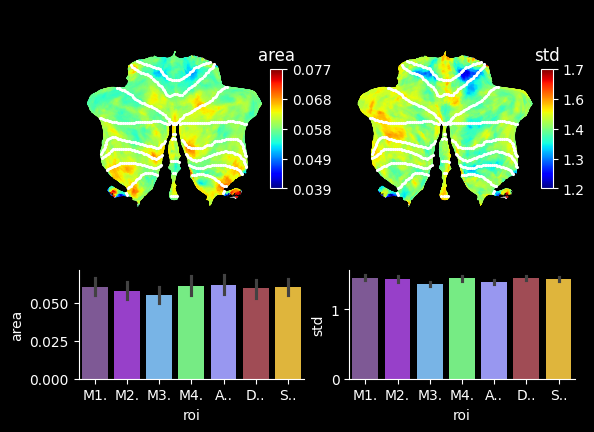

In [22]:
plt.figure(figsize=(12,12))
plt_maps(area1,std1)

## L1 MDTB ses1

In [6]:
area2,var2,std2 = calc_convergence('MDTB','ses-s1','L1Regression','Icosahedron1002','A-4')

/Users/jdiedrichsen/Python/cortico_cereb_connectivity/weights.py:95: RuntimeWarning: invalid value encountered in sqrt
  Std = np.sqrt(-2*np.log(R)) # This is the spherical standard deviation


/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/1944682286.py:21: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(area,axis=0))
/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/1944682286.py:32: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(std,axis=0))


<Figure size 1200x1200 with 0 Axes>

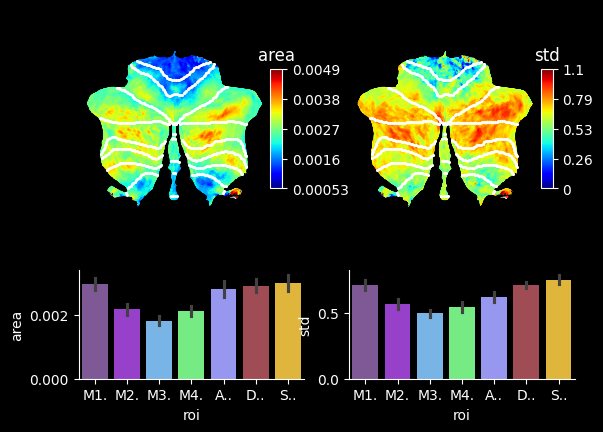

In [23]:
plt.figure(figsize=(12,12))
plt_maps(area2,std2)

## L1 - MDTB all 

In [8]:
area3,var3,std3 = calc_convergence('MDTB','all','L1Regression','Icosahedron1002','A-4')

/Users/jdiedrichsen/Python/cortico_cereb_connectivity/weights.py:95: RuntimeWarning: invalid value encountered in sqrt
  Std = np.sqrt(-2*np.log(R)) # This is the spherical standard deviation


/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/1944682286.py:21: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(area,axis=0))
/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/1944682286.py:32: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(std,axis=0))


<Figure size 1200x1200 with 0 Axes>

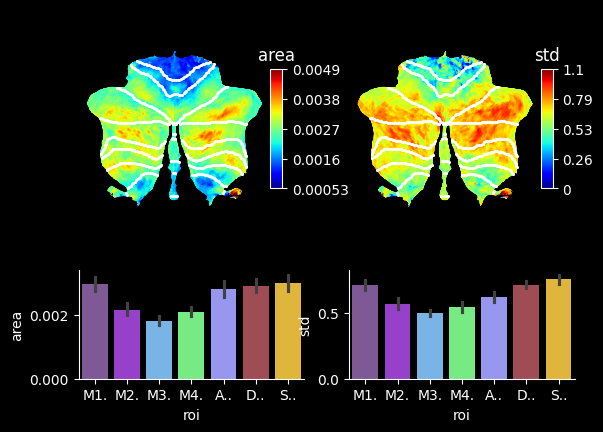

In [24]:
plt.figure(figsize=(12,12))
plt_maps(area3,std3)

## L2 regression Model MDTB all

In [29]:
area4,var4,std4 = calc_convergence('MDTB','all','L2Regression','Icosahedron1002','A8')

/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/2279528419.py:25: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(area,axis=0))
/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/2279528419.py:36: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(std,axis=0))


<Figure size 1200x1200 with 0 Axes>

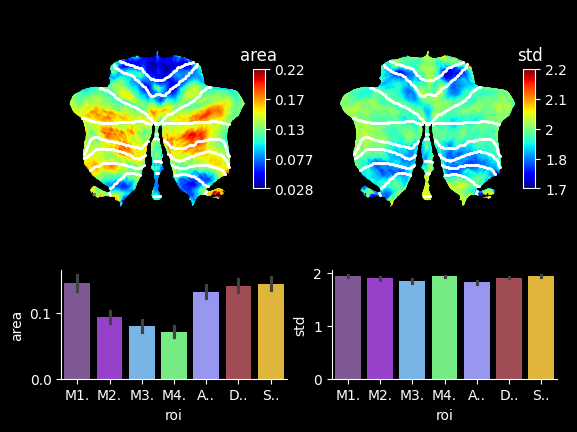

In [30]:
plt.figure(figsize=(12,12))
plt_maps(area4,std4)

## Single figures

/var/folders/sz/7lqgfrln5738xc_hktty2sb00000gp/T/ipykernel_48728/2410310665.py:2: RuntimeWarning: Mean of empty slice
  nii = cerebellum.data_to_nifti(np.nanmean(area3,axis=0))


Text(0.5, 1.0, 'area')

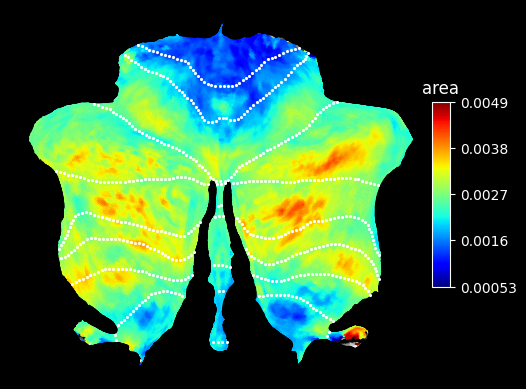

In [20]:
cerebellum,ainf = am.get_atlas('SUIT3')
nii = cerebellum.data_to_nifti(np.nanmean(area3,axis=0))
flat_data = suit.flatmap.vol_to_surf(nii)

suit.flatmap.plot(flat_data,
                      colorbar=True,  
                      bordersize=2.5,
                      bordercolor='w',
                      backgroundcolor='k',
                      new_figure=False)
plt.title('area')